# Skin Lesions Classification:
Standard CNN was based on https://github.com/singhv1shal/Skin-Cancer-Classification-Using-CNN submitted by Vishal Singh. 
## Dataset
This model is trained over ISIC2019 Training dataset which contains lesions with multiple images in ISIC_2019_Training_Input, which can be tracked by the lesion_id-column within the ISIC_2019_Training_Metadata.csv and ISIC_2019_Training_GroundTruth.csv file. The above two files are joined to form a full.csv file which is used in this project.

The data is splitted into train and test set with 80/20 ratio.

## Model
The model uses Convolutional Neural Networks. The starting two layer and last layers contain 32 filters and 64 filters respectively. Average pooling is used 2 times to downsample the image. All intermediate layers use ReLU activation and final layer uses softmax activation.

## Implementational Details
Keras is used to implement the CNN. The model is trained on Jupyter notebook on Google Colab GPU. 

## Result
The model achieved 60.2% accuracy on test data.

In [0]:
#import basic libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image

from warnings import filterwarnings

np.random.seed(101)
filterwarnings('ignore')
sns.set_style('darkgrid')

**Setting data path**

In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# copy file to colab directory
import shutil
shutil.copy2("drive/My Drive/ISIC/ISIC_2019_Training_Input.zip", "./")

'./ISIC_2019_Training_Input.zip'

In [0]:
!unzip -q ISIC_2019_Training_Input.zip

In [0]:
# create image path
base_loc = '/content/ISIC_2019_Training_Input'
image_paths = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(base_loc, '*.jpg'))}
%cd /content/ISIC_2019_Training_Input

/content/ISIC_2019_Training_Input


In [0]:
# merge csv file with image folder
df_skin = pd.read_csv(os.path.join(base_loc, '/content/drive/My Drive/ISIC/full.csv'))
df_skin.head()

,image,diagnosis,age_approx,anatom_site_general,lesion_id,sex,is_val
0,ISIC_0012756_downsampled,MEL,55.0,anterior torso,MSK4_0010029,male,0
1,ISIC_0012930_downsampled,MEL,70.0,posterior torso,MSK4_0010026,female,0
2,ISIC_0013184_downsampled,MEL,55.0,anterior torso,MSK4_0010029,male,0
3,ISIC_0013232_downsampled,MEL,70.0,posterior torso,MSK4_0010026,female,0
4,ISIC_0013274_downsampled,NV,65.0,anterior torso,MSK4_0010011,male,0


In [0]:
# create new column with path information of each lesion
df_skin['image_path'] = df_skin['image'].map(image_paths.get)
df_skin.head()

,image,diagnosis,age_approx,anatom_site_general,lesion_id,sex,is_val,image_path
0,ISIC_0012756_downsampled,MEL,55.0,anterior torso,MSK4_0010029,male,0,/content/ISIC_2019_Training_Input/ISIC_0012756...
1,ISIC_0012930_downsampled,MEL,70.0,posterior torso,MSK4_0010026,female,0,/content/ISIC_2019_Training_Input/ISIC_0012930...
2,ISIC_0013184_downsampled,MEL,55.0,anterior torso,MSK4_0010029,male,0,/content/ISIC_2019_Training_Input/ISIC_0013184...
3,ISIC_0013232_downsampled,MEL,70.0,posterior torso,MSK4_0010026,female,0,/content/ISIC_2019_Training_Input/ISIC_0013232...
4,ISIC_0013274_downsampled,NV,65.0,anterior torso,MSK4_0010011,male,0,/content/ISIC_2019_Training_Input/ISIC_0013274...


In [0]:
# there are 8 target classes
lesion_types = {
    'NV': 'Melanocytic nevi',
    'MEL': 'Melanoma',
    'BKL': 'Benign keratosis-like lesions ',
    'BCC': 'Basal cell carcinoma',
    'AK': 'Actinic keratoses',
    'VASC': 'Vascular lesions',
    'DF': 'Dermatofibroma',
    'SCC': 'Squamous cell carcinoma'}
df_skin['type'] = df_skin['diagnosis'].map(lesion_types.get)

# Converting the type to the categorical values
df_skin['type_id'] = pd.Categorical(df_skin['type']).codes

df_skin.head()

,image,diagnosis,age_approx,anatom_site_general,lesion_id,sex,is_val,image_path,type,type_id
0,ISIC_0012756_downsampled,MEL,55.0,anterior torso,MSK4_0010029,male,0,/content/ISIC_2019_Training_Input/ISIC_0012756...,Melanoma,5
1,ISIC_0012930_downsampled,MEL,70.0,posterior torso,MSK4_0010026,female,0,/content/ISIC_2019_Training_Input/ISIC_0012930...,Melanoma,5
2,ISIC_0013184_downsampled,MEL,55.0,anterior torso,MSK4_0010029,male,0,/content/ISIC_2019_Training_Input/ISIC_0013184...,Melanoma,5
3,ISIC_0013232_downsampled,MEL,70.0,posterior torso,MSK4_0010026,female,0,/content/ISIC_2019_Training_Input/ISIC_0013232...,Melanoma,5
4,ISIC_0013274_downsampled,NV,65.0,anterior torso,MSK4_0010011,male,0,/content/ISIC_2019_Training_Input/ISIC_0013274...,Melanocytic nevi,4


In [0]:
#show am example of the array of image after resizing it to (100,75) as one tenth of its original size to same computational time and RAM
print(np.asarray(Image.open(df_skin['image_path'][0]).resize((100,75)))[:4])

[[[131 122 125]
  [147 144 153]
  [156 151 158]
  ...
  [ 42  42  50]
  [ 25  26  28]
  [ 63  64  68]]

 [[141 134 141]
  [152 147 153]
  [158 151 158]
  ...
  [ 18  18  20]
  [ 20  21  23]
  [ 16  17  22]]

 [[147 145 150]
  [160 155 161]
  [160 158 163]
  ...
  [126 120 120]
  [ 25  26  28]
  [ 20  23  28]]

 [[154 153 158]
  [162 160 165]
  [164 162 167]
  ...
  [143 137 139]
  [ 35  34  48]
  [ 18  18  20]]]


In [0]:
# merge the csv file containing the label with the array of images after resizing them to (100,75)
df_skin['skin_image'] = df_skin['image_path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [0]:
df_skin.head()

,image,diagnosis,age_approx,anatom_site_general,lesion_id,sex,is_val,image_path,type,type_id,skin_image
0,ISIC_0012756_downsampled,MEL,55.0,anterior torso,MSK4_0010029,male,0,/content/ISIC_2019_Training_Input/ISIC_0012756...,Melanoma,5,"[[[131, 122, 125], [147, 144, 153], [156, 151,..."
1,ISIC_0012930_downsampled,MEL,70.0,posterior torso,MSK4_0010026,female,0,/content/ISIC_2019_Training_Input/ISIC_0012930...,Melanoma,5,"[[[190, 162, 150], [193, 175, 165], [192, 174,..."
2,ISIC_0013184_downsampled,MEL,55.0,anterior torso,MSK4_0010029,male,0,/content/ISIC_2019_Training_Input/ISIC_0013184...,Melanoma,5,"[[[121, 114, 121], [140, 138, 151], [148, 147,..."
3,ISIC_0013232_downsampled,MEL,70.0,posterior torso,MSK4_0010026,female,0,/content/ISIC_2019_Training_Input/ISIC_0013232...,Melanoma,5,"[[[166, 125, 95], [166, 127, 94], [166, 141, 1..."
4,ISIC_0013274_downsampled,NV,65.0,anterior torso,MSK4_0010011,male,0,/content/ISIC_2019_Training_Input/ISIC_0013274...,Melanocytic nevi,4,"[[[38, 42, 54], [33, 34, 54], [65, 60, 67], [1..."


In [0]:
# set features and target
features = df_skin.drop(columns=['type_id'],axis=1)
target = df_skin['type_id']

In [0]:
# count the number of each types of skin lesion present in the dataset
df_skin['type_id'].value_counts()

4    12875
5     4522
1     3323
2     2624
0      867
6      628
7      253
3      239
Name: type_id, dtype: int64

**Splitting data in 80/20 ratio**

In [0]:
# using sklearn library to split the training and testing dataset in 80:20 ratio.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 101)
print('The length of training set is {}\nThe length of testing set is {}\nThe ratio is {}'.format(len(X_train), len(X_test), '80/20'))

The length of training set is 20264
The length of testing set is 5067
The ratio is 80/20


**Normalization**

The standard score (more commonly referred to as a z-score) is calculated for normalization of each element in the array. It is a very useful statistic because it (a) allows to calculate the probability of a score occurring within the normal distribution and (b) enables to compare two scores that are from different normal distributions.

In [0]:
# Put each array of images to its respective list
X_train = np.asarray(X_train['skin_image'].tolist())
X_test = np.asarray(X_test['skin_image'].tolist())
# Normalize each array by calculate normalized z score
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

One Hot Encoding

The target variable will be one-hot vector encoded. This means that the target variable will be a vector of length eight with exactly seven zeros and one at the position of the target's class. [0,0,0,1,0,0,0,0] for example represents a target of class number "3".

In [0]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
y_train = to_categorical(y_train, num_classes= 8)
y_test = to_categorical(y_test, num_classes= 8)

In [0]:
y_test[:9]

array([[0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
print(X_train.shape)
print(X_test.shape)

(20264, 75, 100, 3)
(5067, 75, 100, 3)


**Proposed model - 3 layer standard CNN**

In [0]:
# import keras library
import keras
from keras.models import Model, Sequential
from keras.layers import Conv2D
from keras.layers import Dense, Flatten, Input, AveragePooling2D, Activation,GlobalAveragePooling2D
from keras.optimizers import Adam
from keras import regularizers, initializers
from keras.layers.advanced_activations import ReLU, Softmax
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.models import load_model

In [0]:
# build the standard 3 layer CNN by adding each layer up via Sequential function 
model = Sequential()
# the first layer is built with a convolutional 2D layer with 32 filters and kernel size of (3,3) using ReLU as activation function. Average pooling with size (2,2) is used to downsample the layer.
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'Same', input_shape = (75, 100, 3)))
model.add(AveragePooling2D(pool_size= (2, 2)))

# the second and third layers are built with convolutional 2D layers with 64 filters and the rest is the same as the first layer.
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'Same'))
model.add(AveragePooling2D(pool_size= (2, 2)))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'Same'))

# the model is then flattened and a dense layer with ReLU activation function added to reduce and condense the dimension.
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))

# final layer uses a dense function to condense the output to the number of classification classes with use of softmax activation.
model.add(Dense(8, activation= 'softmax'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 100, 32)       896       
_________________________________________________________________
average_pooling2d_1 (Average (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 50, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 18, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 25, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)          

In [0]:
# To compile to model:
# Adam optimizer is used
# Since one-hot-ecoded vectors are used, the categorical cross entropy is used as loss and the metric is set to be top-1 accuracy
model.compile(Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

# For each episode the input data is shuffled to create a different order for the inputs
# Batch size is set to be 32 meaning that there are 32 samples fed into the model per gradient update.
# 50 epochs mean that the model will be trained and iterated on the dataset for 50 times.
mod = model.fit(x = X_train, y = y_train, batch_size=32, shuffle=True, epochs= 50)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





20264/20264 [==============================] - 37s 2ms/step - loss: 1.1788 - acc: 0.5793
Epoch 2/50
20264/20264 [==============================] - 26s 1ms/step - loss: 1.0378 - acc: 0.6247
Epoch 3/50
20264/20264 [==============================] - 26s 1ms/step - loss: 0.9367 - acc: 0.6594
Epoch 4/50
20264/20264 [==============================] - 27s 1ms/step - loss: 0.8008 - acc: 0.7067
Epoch 5/50
20264/20264 [==============================] - 27s 1ms/step - loss: 0.6247 - acc: 0.7733
Epoch 6/50
20264/20264 [==============================] - 27s 1ms/step - loss: 0.4284 - acc: 0.8477
Epoch 7/50
20264/20264 [==============================] - 27s 1ms/step - loss: 0.2537 - acc: 0.9111
Epoch 8/50
20264/20264 [==============================] - 27s 1ms/step - loss: 0.1505 - acc: 0.9486
Epoch 9/50
20264/20264 [==============================] - 27s 1ms/step - loss: 0.1132 - acc: 0.9

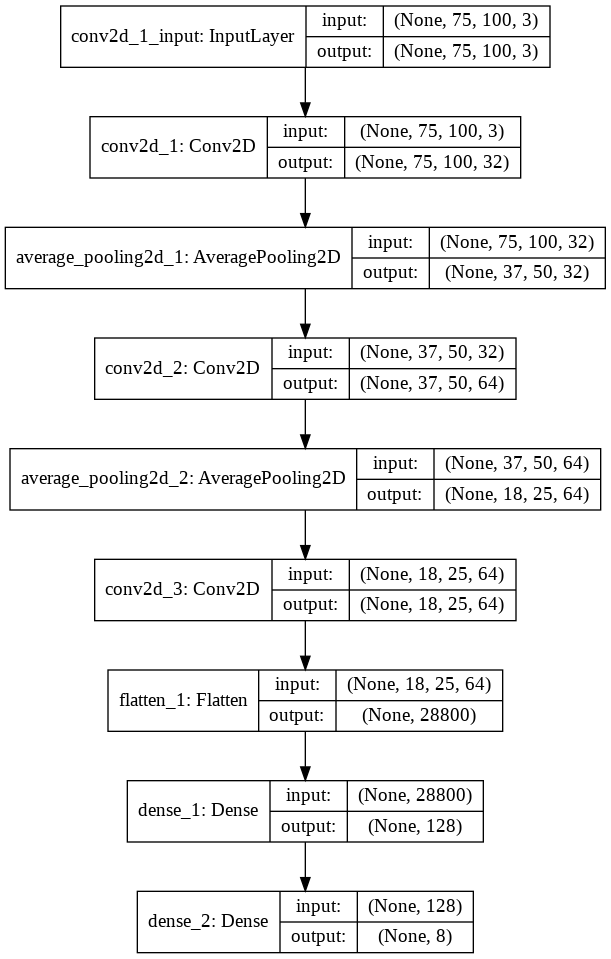

In [0]:
# plot_model function is used to visualize the model
plot_model(model, to_file='simple_model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
model.save('skin.cr')

**Evaluation**

In [0]:
# Evaluate the accuracy and loss of the model on test dataset
# https://keras.io/models/model/#evaluate
loss,acc = model.evaluate(X_test, y_test)
print("The accuracy of the model is {:.3f}\nThe loss in the model is {:.3f}".format(acc,loss))

5067/5067 [==============================] - 3s 618us/step
The accuracy of the model is 0.602
The loss in the model is 4.420


**The subsequent evaluation is not reflected in the report because this CNN model is not the top-performing one.**

It is left in the code just in case you are interested.

In [0]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report
model = load_model('skin.cr')

In [0]:
# Function to plot confusion matrix
# Taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix_normalized(cm, classes,
                          normalize=True,
                          title='Normalized confusion matrix',
                          cmap=plt.cm.Blues):
    # compute confusion matrix - this function plots normalized confusion matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    # All ticks are shown
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Put respective labels on the plot
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.grid(None)

In [0]:
# this function shows non-normalized confusion matrix
def plot_confusion_matrix_nonnormalized(cm, classes,
                          normalize=False,
                          title='Non-normalized confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.grid(None)

In [0]:
# Using the model to generate predictions
predictions = model.predict(X_test)
# Predictions are converted to one hot vectors.
y_pred = np.argmax(predictions,axis = 1) 

In [0]:
# Target label is converted to one hot vectors
y_true = np.argmax(y_test,1)

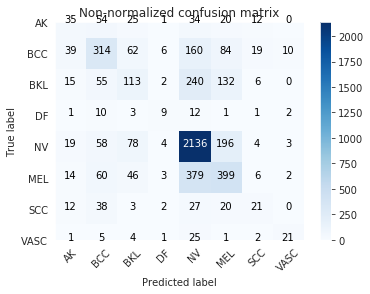

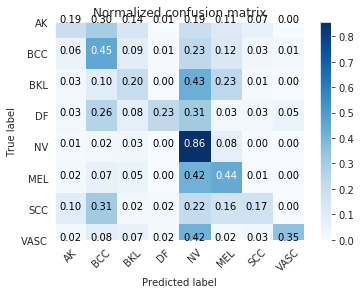

In [0]:
cm = confusion_matrix(y_true, y_pred)
classes = ['AK','BCC','BKL','DF','NV','MEL','SCC','VASC']

# Plot non-normalized confusion matrix
plot_confusion_matrix_nonnormalized(cm, classes)
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix_normalized(cm, classes)
plt.show()

In [0]:
# Generate classification report to evaluate the model
report = classification_report(y_true, y_pred, target_names=classes)
print(report)

              precision    recall  f1-score   support

          AK       0.26      0.19      0.22       181
         BCC       0.53      0.45      0.49       694
         BKL       0.34      0.20      0.25       563
          DF       0.32      0.23      0.27        39
          NV       0.71      0.86      0.78      2498
         MEL       0.47      0.44      0.45       909
         SCC       0.30      0.17      0.22       123
        VASC       0.55      0.35      0.43        60

    accuracy                           0.60      5067
   macro avg       0.43      0.36      0.39      5067
weighted avg       0.57      0.60      0.58      5067



- Precision: the ability of a classiifer not to label an 
instance positive that is actually negative. Aka for all instances classified positive, what percent was correct?
- Recall: the ability of a classifier to find all positive instances. Aka for all instances that were actually positive, what percent was classified correctly?
- f1-score: a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
- Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

**Case specific evaluation**

Further evaluation is conducted on the binary classification performance of the model. 

Class 1 (basal cell carcinoma), 5 (melanoma) and 6 (squamous cell carcinoma) are cancerous, where class 5 (melanoma) is especially dangerous. 

Therefore, one metric will calculate the performance in distinguishing all forms of cancer from the rest; and the second metric will evaluate the distinction between melanoma from the rest 7 lesions.

The code for this evaluation method is adapted from https://github.com/pegahbyte/deep_learning_image_classification/blob/master/SkinCancerClassification_Project.ipynb

In [0]:
def cancer_detection(model, threshold=0.5):
    '''This function returns the confusion matrix for
    binary cancer detection for a given model and threshold'''
    
    # Define target 1,5 and 6 as dangerous cancer lesions
    # and the other 5 groups as benign
    y_true=[1 if np.argmax(y_test[i]) in [1,5,6] else 0 for i in range(len(y_test))]
    # Predict the values from the test dataset
    y_pred = model.predict(X_test)
    y_pred=[1 if y_pred[i][1]+y_pred[i][5]+y_pred[i][6] > threshold else 0 for i in range(len(y_test))]
    confusion_mtrx=confusion_matrix(y_true,y_pred)
    return(confusion_mtrx)  

def melanoma_detection(model, threshold=0.5):
    '''This function returns the confusion matrix for
    binary melanom detection for a given model and threshold'''
    # Define target 5 as melanoma lesions
    # and the other 7 groups as non-melanoma lesions
    y_true=[1 if np.argmax(y_test[i]) in [5] else 0 for i in range(len(y_test))]
    # Predict the values from the test dataset
    y_pred = model.predict(X_test)
    y_pred=[1 if y_pred[i][5] > threshold else 0 for i in range(len(y_test))]
    confusion_mtrx=confusion_matrix(y_true,y_pred)
    return(confusion_mtrx)

Cancer detection

In [0]:
# generate cancer detection confusion matrix
model_cd = cancer_detection(model)
print(model_cd)

[[2786  555]
 [ 765  961]]


In [0]:
# calculate binary accuracy, false positive rate and false negative rate.
acccd=(model_cd[0,0]+model_cd[1,1])/(sum(sum(model_cd)))
fncd=model_cd[1,0]/sum(model_cd)[1]
fpcd=model_cd[0,1]/sum(model_cd)[0]
print("For the model, the cancer binary-accuracy is", acccd, "\nThe false positive rate is", fpcd,"and the false negative rate is",
     fncd)

For the model, the cancer binary-accuracy is 0.7394908229721728 
The false positive rate is 0.1562940016896649 and the false negative rate is 0.5046174142480211


Melanoma detection

In [0]:
# generate melanoma detection confusion matrix
model_md = melanoma_detection(model)
print(model_md)
# calculate binary accuracy, false positive rate and false negative rate.
accmd=(model_md[0,0]+model_md[1,1])/(sum(sum(model_md)))
fnmd=model_md[1,0]/sum(model_md)[1]
fpmd=model_md[0,1]/sum(model_md)[0]
print("For the model, the melanoma binary-accuracy is", accmd, "\nThe false positive rate is", fpmd,"and the false negative rate is",
     fnmd)

[[3706  452]
 [ 512  397]]
For the model, the melanoma binary-accuracy is 0.8097493585948293 
The false positive rate is 0.10715979137031768 and the false negative rate is 0.6030624263839811


**Adaptive threshold**

Changing the threshold for cancer detection and see its effects.

In [0]:
thresholds=np.arange(0, 1, 0.05)
resultsFN=[]
resultsFP=[]
costs=[]
for t in thresholds:
    results=cancer_detection(model, t)
    resultsFN.append(results[1,0])
    resultsFP.append(results[0,1])

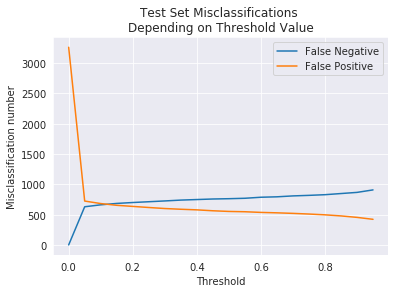

In [0]:
# plot misclassification number against threshold value
plt.plot(thresholds,resultsFN, label="False Negative")
plt.plot(thresholds,resultsFP, label="False Positive")
plt.xlabel('Threshold')
plt.ylabel('Misclassification number')
plt.legend()
plt.title("Test Set Misclassifications \nDepending on Threshold Value");

<function matplotlib.pyplot.imshow>

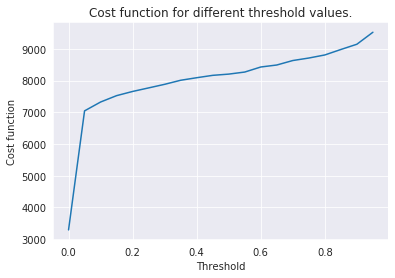

In [0]:
def costs(fn, fp, costFP=1, costFN=10):
    '''Calculates the "cost" of misclassification errors'''
    cost=[fn[i]*costFN+costFP*fp[i] for i in range(len(fn))]
    return(cost)

costs=costs(resultsFN,resultsFP)
plt.plot(thresholds,costs, label="Costs") 
plt.title("Cost function for different threshold values.")
plt.xlabel('Threshold')
plt.ylabel('Cost function')
plt.imshow

**Visualizing Curves**

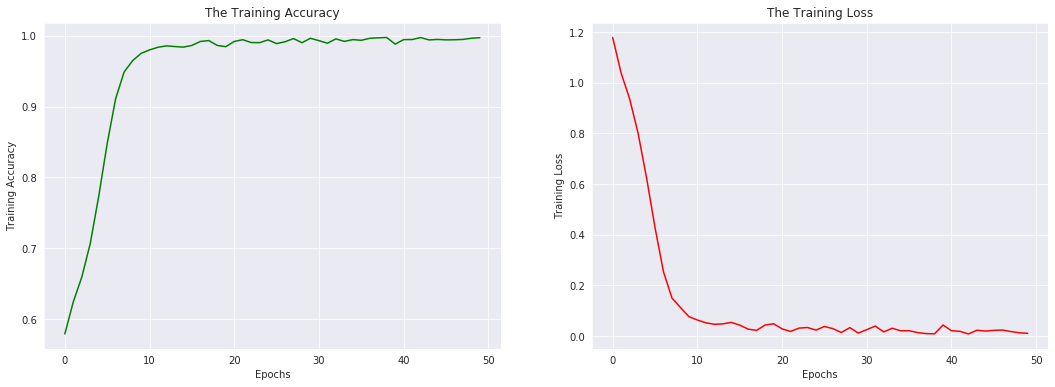

In [0]:
# Visualize the change in training accuracy and loss in the 50 epochs
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(mod.history['acc'], color = 'green')
plt.title('The Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.subplot(1,2,2)
plt.plot(mod.history['loss'], color = 'red')
plt.title('The Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()